# 2013 Sales Data Analysis for Y&M Supermarket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:/Users/Albert Kutin-Mensah/Documents/Downloads/sales_data.csv")

In [3]:
df.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


### Market Share

In [4]:
#1i & iii. Average sales & Profit by Market
Avg_PnS = pd.pivot_table(df, values =["Sales", "Profit"], index=["Market"], aggfunc= {"Sales" : np.mean, "Profit":np.mean})
Avg_PnS

,Profit,Sales
Market,,
APAC,42.596237,337.225210
Africa,20.623734,177.023796
Canada,48.391132,180.765566
EMEA,8.102479,156.453122
EU,38.373754,297.415215
LATAM,20.070383,198.738815
US,31.677105,235.842570


## Best & Least 10 Performing Products

In [5]:
#  2i. Option 1

#Best 10 performing products
#using pivot table method

Best_10 = pd.pivot_table(df, index=["Product Name"], values= ["Quantity", "Sales"], aggfunc={"Quantity": np.sum, "Sales": np.sum})
Best_10.sort_values("Quantity", ascending = False).head(10)

,Quantity,Sales
Product Name,,
Staples,205,1521.0560
"Cardinal Index Tab, Clear",119,688.9986
"Eldon File Cart, Single Width",102,10988.0957
"Rogers File Cart, Single Width",94,10895.2448
"Harbour Creations Chairmat, Black",84,4181.1570
"Smead File Cart, Single Width",82,8813.0454
"Ibico Index Tab, Clear",81,559.1916
"Avery Index Tab, Clear",76,369.0830
"Ibico Binding Machine, Recycled",72,3227.2748


In [6]:
#Option 2

#using groupby method

Best_Prod = df.groupby(["Product Name"]).sum().sort_values(by=["Quantity", "Sales"], ascending =False)[["Quantity","Sales"]]
Best_Prod.head(10)

,Quantity,Sales
Product Name,,
Staples,205,1521.0560
"Cardinal Index Tab, Clear",119,688.9986
"Eldon File Cart, Single Width",102,10988.0957
"Rogers File Cart, Single Width",94,10895.2448
"Harbour Creations Chairmat, Black",84,4181.1570
"Smead File Cart, Single Width",82,8813.0454
"Ibico Index Tab, Clear",81,559.1916
"Avery Index Tab, Clear",76,369.0830
"Ibico Binding Machine, Recycled",72,3227.2748


In [7]:
# 2ii. least 10 products

Least_Prod = df.groupby(["Product Name"]).sum().sort_values(by=["Quantity", "Sales"], ascending = True)[["Quantity","Sales"]]
Least_Prod.head(10)

,Quantity,Sales
Product Name,,
Newell 310,1,1.408
"OIC #2 Pencils, Medium Soft",1,1.504
"Acco Banker's Clasps, 5 3/4""-Long",1,2.304
Avery 479,1,2.610
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",1,2.672
Newell 32,1,2.880
Avery 480,1,3.000
Manco Dry-Lighter Erasable Highlighter,1,3.040
Avery 517,1,3.690


## Monthly Profit Trend Analysis

In [8]:
#3i. Extracting and adding columns

df["Order Date"]= pd.to_datetime(df["Order Date"],format= '%Y-%m-%d')

In [9]:
df["Day"] = df["Order Date"].dt.day
df["Month"] = df["Order Date"].dt.month
df.head()


#would prefer getting rid of the order date column and substsituting new columns in that index

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Day,Month
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,1,1
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,1,1
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,1,1
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060,1,1
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410,1,1


In [10]:
# 3ii. Profit_Trend_analysis

Pta= pd.pivot_table(df, index=["Month"] , values=["Profit"])
Pta

,Profit
Month,
1,32.688083
2,41.848803
3,38.921562
4,28.897835
5,33.695694
6,30.513636
7,26.805469
8,24.665487
9,12.634109


Text(0, 0.5, 'Profit')

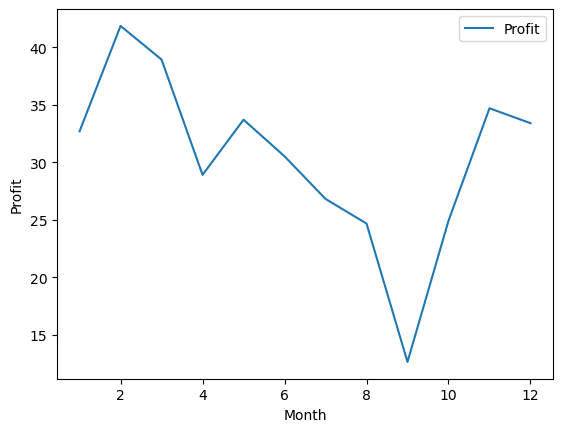

In [11]:
#using line plot,


Pta.plot(y="Profit", use_index = True)
plt.xlabel("Month")
plt.ylabel("Profit")

In [12]:
#3iii. profitable month

Pta.max()

Profit    41.848803
dtype: float64

In [13]:
# creating df for most profitable month 
best_month= df["Month"]== 2
df_bm= df[best_month]
df_bm

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Day,Month
381,381,2013-02-01,ID-2013-29564,RL-19615,Rob Lucas,Consumer,Newcastle,APAC,Oceania,Furniture,Bookcases,"Bush Library with Doors, Metal",1637.0100,5,0.100,-36.3900,1,2
382,382,2013-02-01,IR-2013-3500,AG-525,Andy Gerbode,Corporate,Ardabil,EMEA,EMEA,Technology,Phones,"Motorola Signal Booster, Full Size",2021.8800,14,0.000,323.4000,1,2
383,383,2013-02-01,ES-2013-5114494,KW-16435,Katrina Willman,Consumer,Derby,EU,North,Furniture,Bookcases,"Sauder Floating Shelf Set, Pine",1567.4400,8,0.000,360.4800,1,2
384,384,2013-02-01,MX-2013-159583,TN-21040,Tanja Norvell,Home Office,Mérida,LATAM,North,Technology,Copiers,"Brother Fax Machine, High-Speed",1053.6884,5,0.002,441.2884,1,2
385,385,2013-02-01,ES-2013-1059602,BS-11755,Bruce Stewart,Consumer,Livry-Gargan,EU,Central,Office Supplies,Appliances,"Hoover Stove, Black",1533.3300,3,0.100,-34.1100,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12385,12385,2013-02-28,ES-2013-5431940,TP-21130,Theone Pippenger,Consumer,Gien,EU,Central,Office Supplies,Fasteners,"OIC Paper Clips, Metal",14.5500,1,0.000,3.7800,28,2
12386,12386,2013-02-28,TU-2013-5530,SC-10095,Sanjit Chand,Consumer,Izmir,EMEA,EMEA,Office Supplies,Storage,"Smead Shelving, Industrial",19.7640,1,0.600,-17.7960,28,2
12387,12387,2013-02-28,ES-2013-4295346,JS-16030,Joy Smith,Consumer,Le Mans,EU,Central,Office Supplies,Binders,"Cardinal Hole Reinforcements, Durable",6.8400,2,0.500,-4.0200,28,2
12388,12388,2013-02-28,TU-2013-5530,SC-10095,Sanjit Chand,Consumer,Izmir,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Industrial",6.7920,1,0.600,-2.2080,28,2


In [14]:
#Validating new df

df_bm.groupby(["Month"])["Day"].max()

Month
2    28
Name: Day, dtype: int64

In [15]:
# 3iii. 5 most popular product in profitable month

Feb_Prod = df_bm.groupby(["Product Name"]).sum().sort_values(by=["Sales"], ascending =False)[["Sales"]]
Feb_Prod.head()

,Sales
Product Name,
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",8749.950
"KitchenAid Refrigerator, Black",7910.550
Ativa V4110MDD Micro-Cut Shredder,4899.930
GBC DocuBind P400 Electric Binding System,4355.168
"Chromcraft Wood Table, Adjustable Height",3877.680


In [16]:
# 3iv. highest sale day

Peak_Day = df_bm.groupby(["Day"]).sum().sort_values(by=["Sales"], ascending =False)[["Sales"]].head(1)
Peak_Day

,Sales
Day,
12,15644.011


## Correlation between Sales, Discount & Profit

In [17]:
# 4i. Cor_Coefficient

df["Sales"].corr(df["Discount"])

-0.08470981142655344

Text(0.5, 1.0, 'Correlation Between Sales & Profit')

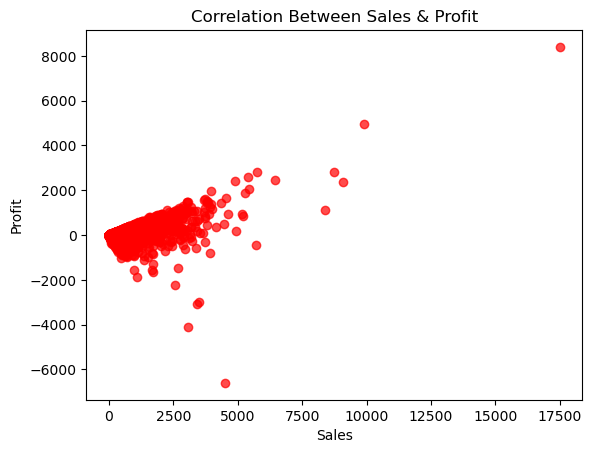

In [18]:
#4ii. correlation using scatter plot

plt.scatter(df["Sales"],df["Profit"], color= "r", alpha = 0.7)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Correlation Between Sales & Profit")

## Grouped Bar Chart - product market share 

Text(0, 0.5, 'Profit')

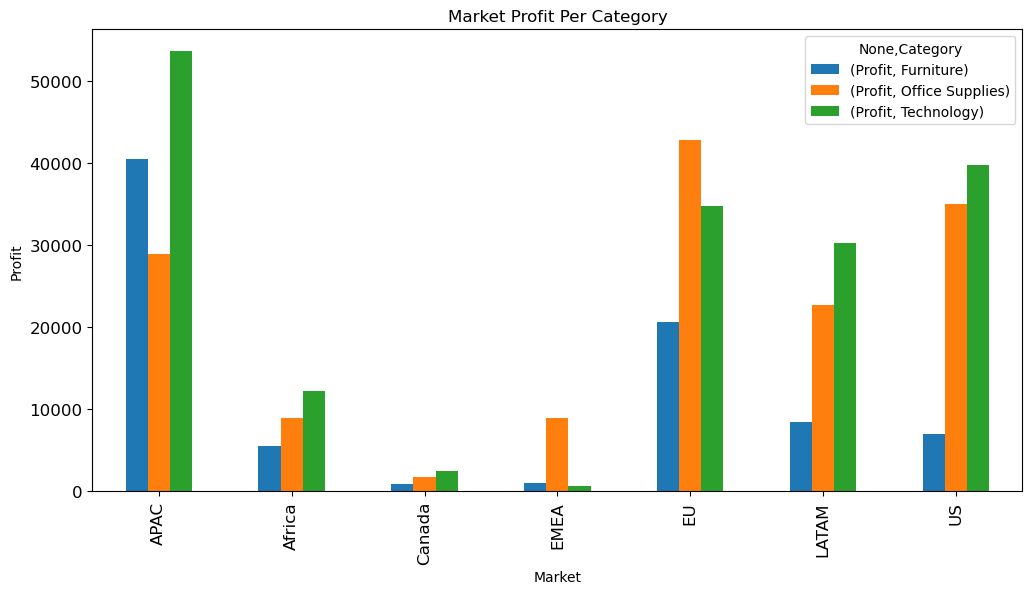

In [19]:
# 5. using pivot table,

g_bar = pd.pivot_table(df, index=["Market"], columns= ["Category"],values = ["Profit"],aggfunc = {"Profit":np.sum})

#plottting market share using bar chart
g_bar.plot(kind="bar",figsize=(12,6),fontsize= 12,title= "Market Profit Per Category")
plt.xlabel("Market")
plt.ylabel("Profit")

## Customer Analysis

In [20]:
# 6. Option 1:

#most valuable customer,Most spent on product& cost,Peak month
MVC = df.groupby(["Customer Name","Product Name","Month"]).sum().sort_values(by=["Sales"], ascending =False)[["Sales"]]
MVC.head(1)

,,,Sales
Customer Name,Product Name,Month,
Tamara Chand,Canon imageCLASS 2200 Advanced Copier,3,17499.95


In [21]:
#OPtion 2

#Customer that spends most and what he bought most

MVC = pd.pivot_table(df, index=["Customer Name","Product Name"], values= ["Sales"], aggfunc={ "Sales": np.sum})
MVC.sort_values(["Sales"],ascending = False).head(1)


,,Sales
Customer Name,Product Name,
Tamara Chand,Canon imageCLASS 2200 Advanced Copier,17499.95


In [22]:
#month MVC spent the most and what he spent for the year

df_mvc = df[df["Customer Name"] == "Tamara Chand"]
atts=["Month","Sales"]
monthly_spending = df_mvc[atts]
monthly_spending.groupby(["Month"]).sum().sort_values(["Sales"],ascending=False).head(1)

,Sales
Month,
3,18336.74
